In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import thingspeak

In [ ]:
import config

In [3]:
channel_id = channel_id
write_api_key = API_key

channel = thingspeak.Channel(channel_id, write_api_key)

In [4]:
data = channel.get()

In [5]:
print(data)

{"channel":{"id":2508411,"name":"asthma exaccerbations trigger","latitude":"12.972149","longitude":"79.162533","field1":"CO","field2":"SO2","field3":"O3","field4":"AQI","created_at":"2024-04-15T13:53:29Z","updated_at":"2024-04-16T17:50:36Z","last_entry_id":762},"feeds":[{"created_at":"2024-04-16T10:18:14Z","entry_id":663,"field1":"13.29","field2":"12.98","field3":"13.18","field4":"67.63\r\n"},{"created_at":"2024-04-16T10:18:29Z","entry_id":664,"field1":"13.62","field2":"13.38","field3":"13.56","field4":"57.36\r\n"},{"created_at":"2024-04-16T10:18:45Z","entry_id":665,"field1":"13.73","field2":"13.41","field3":"13.62","field4":"55.51\r\n"},{"created_at":"2024-04-16T10:19:00Z","entry_id":666,"field1":"13.73","field2":"13.41","field3":"13.62","field4":"54.91\r\n"},{"created_at":"2024-04-16T10:19:16Z","entry_id":667,"field1":"13.76","field2":"13.41","field3":"13.64","field4":"54.91\r\n"},{"created_at":"2024-04-16T10:19:31Z","entry_id":668,"field1":"14.02","field2":"13.38","field3":"13.62","

In [6]:
import json

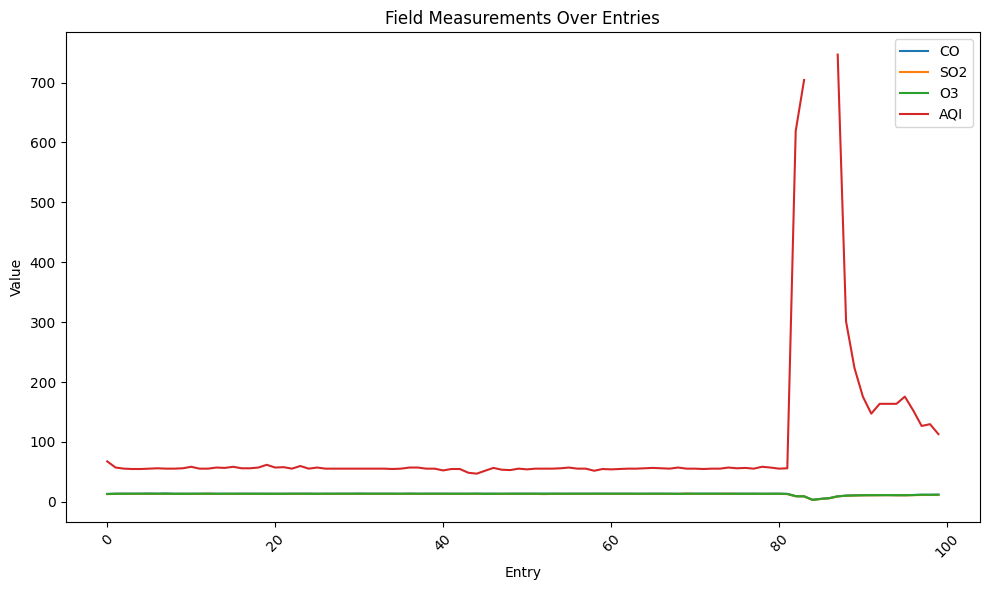

In [7]:
data = json.loads(data)
fields_data = [{k: v for k, v in entry.items() if k.startswith('field')} for entry in data['feeds']]
df = pd.DataFrame(fields_data)
# Convert fields to numeric
df[['field1', 'field2', 'field3', 'field4']] = df[['field1', 'field2', 'field3', 'field4']].astype(float)

# Plot the fields
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['field1'], label='CO')
plt.plot(df.index, df['field2'], label='SO2')
plt.plot(df.index, df['field3'], label='O3')
plt.plot(df.index, df['field4'], label='AQI')
plt.xlabel('Entry')
plt.ylabel('Value')
plt.title('Field Measurements Over Entries')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
df = pd.read_csv("C:/Users/anush/Downloads/city_day.csv/Asthma_data.csv")

In [9]:
df.head()

,Date,CO,SO2,O3,AQI,latitude,longitude
0,16-04-2024,2.72,43.62,54.78,118.0,12.972149,79.162533
1,16-04-2024,3.14,22.27,32.26,120.0,12.972149,79.162533
2,16-04-2024,5.27,14.91,41.19,106.0,12.972149,79.162533
3,16-04-2024,0.64,16.31,8.02,105.0,12.972149,79.162533
4,16-04-2024,0.60,18.93,6.20,101.0,12.972149,79.162533


## Basic Statistical Analysis of Data

In [10]:
df.shape

(660, 7)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       660 non-null    object 
 1   CO         643 non-null    float64
 2   SO2        642 non-null    float64
 3   O3         629 non-null    float64
 4   AQI        634 non-null    float64
 5   latitude   660 non-null    float64
 6   longitude  660 non-null    float64
dtypes: float64(6), object(1)
memory usage: 36.2+ KB


### Finding Null values

In [12]:
df.isnull().sum()

Date          0
CO           17
SO2          18
O3           31
AQI          26
latitude      0
longitude     0
dtype: int64

### Handling Null values (mean)

In [13]:
CO_mean = df["CO"].mean()
df["CO"].fillna(CO_mean,inplace=True)

SO2_mean = df["SO2"].mean()
df["SO2"].fillna(SO2_mean,inplace=True)

O3_mean = df["O3"].mean()
df["O3"].fillna(O3_mean,inplace=True)

AQI_mean = df["AQI"].mean()
df["AQI"].fillna(AQI_mean,inplace=True)

C:\Users\anush\AppData\Local\Temp\ipykernel_2804\3087512119.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["CO"].fillna(CO_mean,inplace=True)
C:\Users\anush\AppData\Local\Temp\ipykernel_2804\3087512119.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

In [14]:
df.isnull().sum()

Date         0
CO           0
SO2          0
O3           0
AQI          0
latitude     0
longitude    0
dtype: int64

In [15]:
df.head()

,Date,CO,SO2,O3,AQI,latitude,longitude
0,16-04-2024,2.72,43.62,54.78,118.0,12.972149,79.162533
1,16-04-2024,3.14,22.27,32.26,120.0,12.972149,79.162533
2,16-04-2024,5.27,14.91,41.19,106.0,12.972149,79.162533
3,16-04-2024,0.64,16.31,8.02,105.0,12.972149,79.162533
4,16-04-2024,0.60,18.93,6.20,101.0,12.972149,79.162533


In [16]:
df.describe()

,CO,SO2,O3,AQI,latitude,longitude
count,660.000000,660.000000,660.000000,660.000000,6.600000e+02,6.600000e+02
mean,13.400218,35.664003,33.967440,295.255521,1.297215e+01,7.916253e+01
std,21.825650,41.517822,19.592336,324.859556,1.777704e-15,1.422163e-14
min,0.060000,0.900000,0.180000,23.000000,1.297215e+01,7.916253e+01
25%,0.630000,8.637500,19.897500,88.000000,1.297215e+01,7.916253e+01
50%,6.050000,15.100000,31.770000,176.500000,1.297215e+01,7.916253e+01
75%,14.935000,41.105000,44.590000,338.500000,1.297215e+01,7.916253e+01
max,145.320000,171.320000,131.120000,2049.000000,1.297215e+01,7.916253e+01


## Correlation Analysis

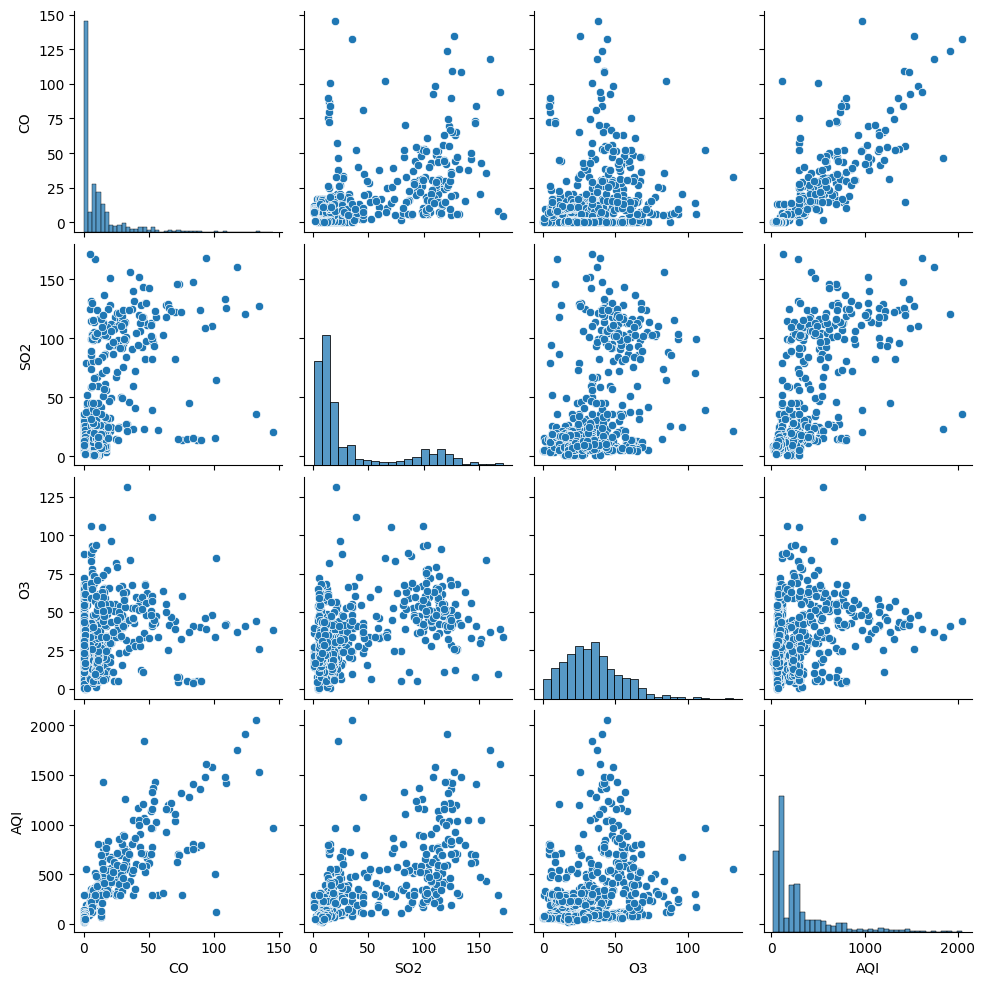

In [17]:

sns.pairplot(df[['CO', 'SO2', 'O3', 'AQI']])

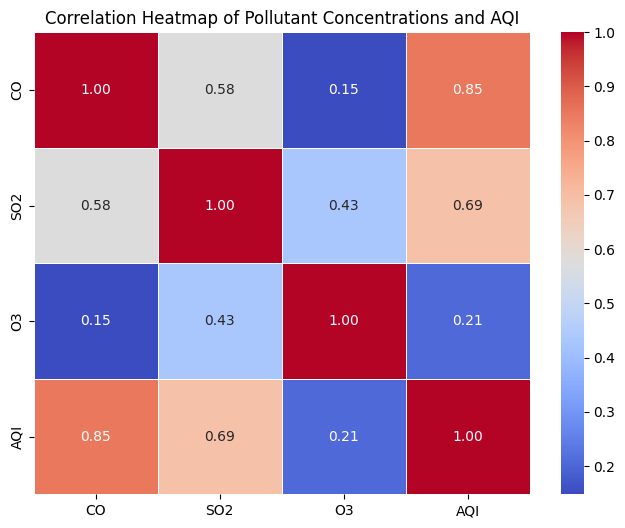

In [18]:
# Calculate the correlation matrix
correlation_matrix = df[['CO', 'SO2', 'O3', 'AQI']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Pollutant Concentrations and AQI')
plt.show()


## Distribution Visualization

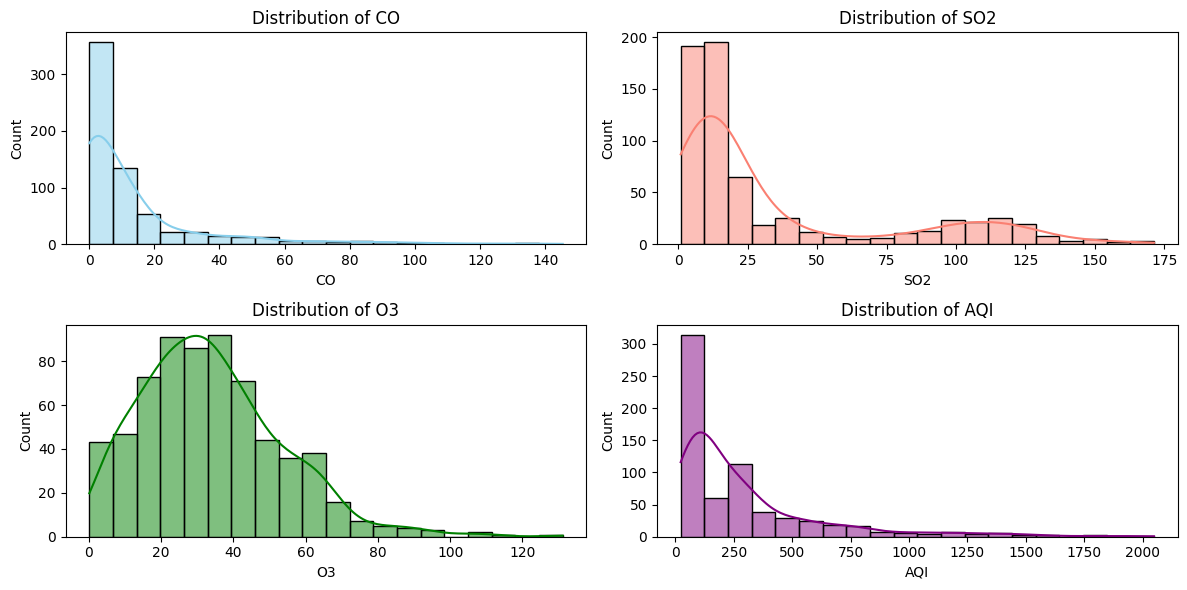

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['CO'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of CO')

plt.subplot(2, 2, 2)
sns.histplot(df['SO2'], bins=20, kde=True, color='salmon')
plt.title('Distribution of SO2')

plt.subplot(2, 2, 3)
sns.histplot(df['O3'], bins=20, kde=True, color='green')
plt.title('Distribution of O3')

plt.subplot(2, 2, 4)
sns.histplot(df['AQI'], bins=20, kde=True, color='purple')
plt.title('Distribution of AQI')

plt.tight_layout()
plt.show()



## Outlier detection

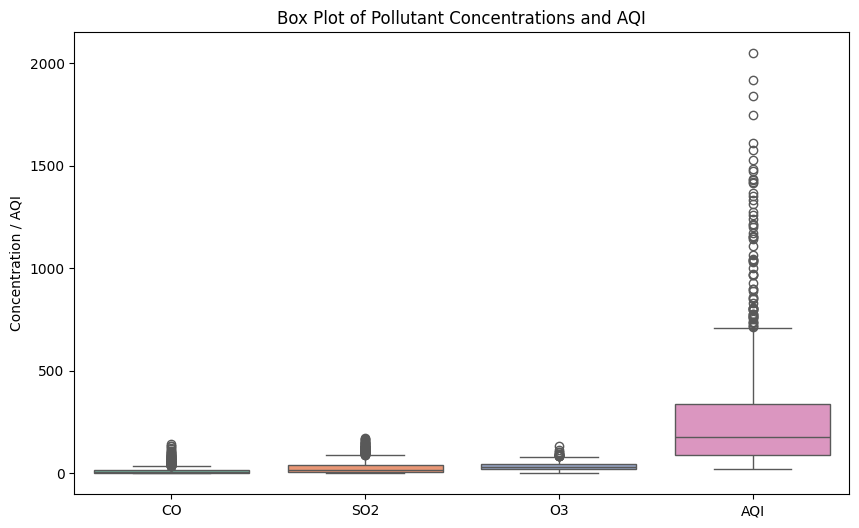

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['CO', 'SO2', 'O3', 'AQI']], palette="Set2")
plt.title('Box Plot of Pollutant Concentrations and AQI')
plt.ylabel('Concentration / AQI')
plt.show()

### Handling outliers (log transformation)

In [21]:
columns_to_transform = ['CO', 'SO2', 'O3', 'AQI']

# Apply log transformation to selected columns
df[columns_to_transform] = np.log(df[columns_to_transform])

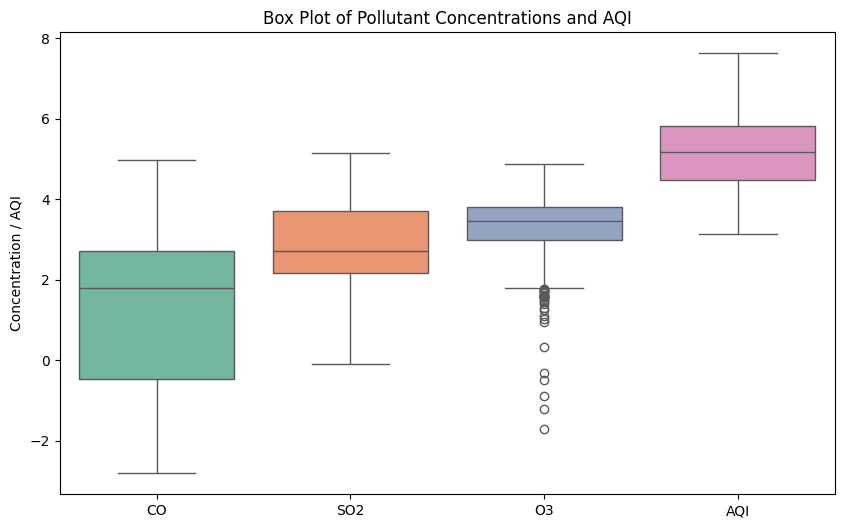

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['CO', 'SO2', 'O3', 'AQI']], palette="Set2")
plt.title('Box Plot of Pollutant Concentrations and AQI')
plt.ylabel('Concentration / AQI')
plt.show()

## Test Train Split

In [23]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['AQI','Date'])
y = df['AQI']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build Model

In [25]:
from sklearn import linear_model
model=linear_model.LinearRegression()

In [26]:
model.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)


In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [34]:

print("R-squared:", r2)

R-squared: 0.8251503492782557


## Visualize model Performance

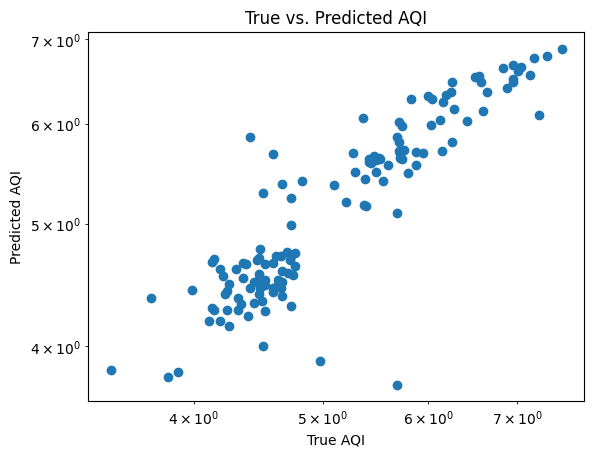

In [30]:
scatter = plt.scatter(y_test, y_pred)
scatter.axes.set_yscale('log')
scatter.axes.set_xscale('log')
plt.xlabel("True AQI")
plt.ylabel("Predicted AQI")
plt.title("True vs. Predicted AQI")
plt.show()

### Plots the difference between actual and predicted values

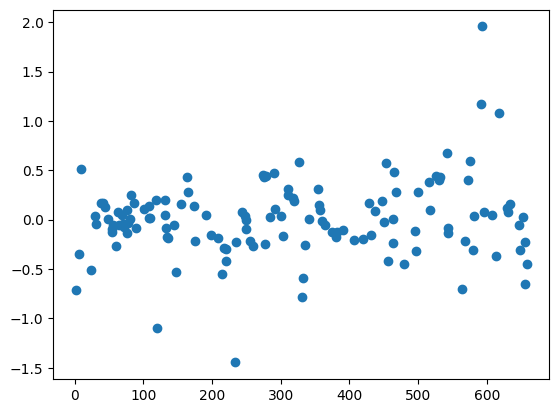

In [31]:
g=plt.plot(y_test - y_pred,marker='o',linestyle='')

### Tells the importance of the features based on the coefficients given by the linear regression model

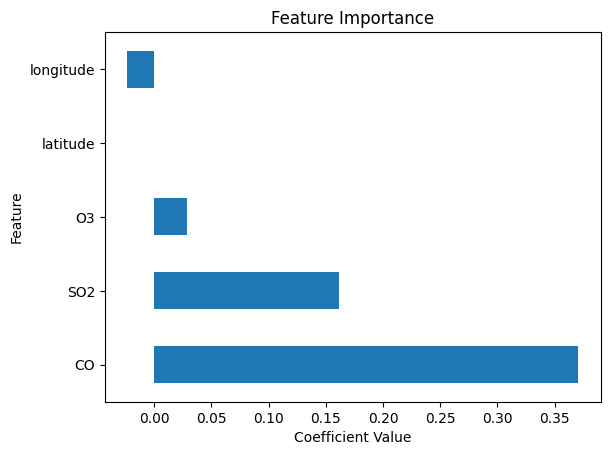

In [32]:
feature_importance = pd.Series(model.coef_, index=X_train.columns)
feature_importance.plot(kind='barh')
plt.title("Feature Importance")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

## Pickle File

In [33]:
import pickle
pickleout = open("regression.pkl", "wb")
pickle.dump(model, pickleout)
pickleout.close()